In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv


# > **Importing libraries**

In [11]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# > **Read dataset**

In [3]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/manufacturing-data-for-polynomial-regression/manufacturing.csv"))

# > **Data overview**

In [4]:
df.shape

(3957, 6)

In [5]:
df.columns

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [7]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


It seems like we have a column which is a combination of Temperature and Pressure. This column can be delelted as we are able to get the desired result from Temperature and Pressure columns already. So we make a copy of this dataframe and drop the Temperature x Pressure	column in the copied dataframe.

In [8]:
df1 = df.copy()
df1.drop('Temperature x Pressure', axis=1, inplace=True)
df1.head()

,Temperature (°C),Pressure (kPa),Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,38068.201283,6.303792e+06,100.000000


# > **Checking the outliers**

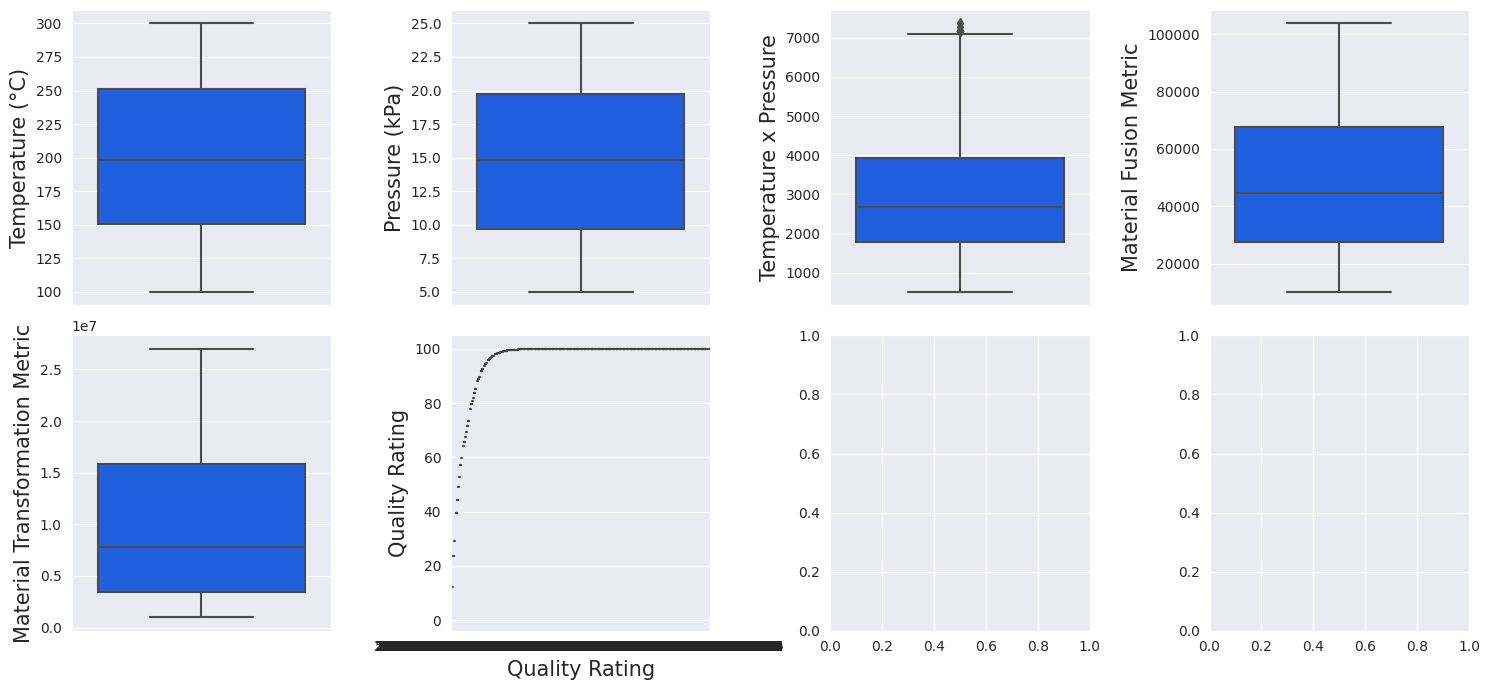

In [12]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Quality Rating', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

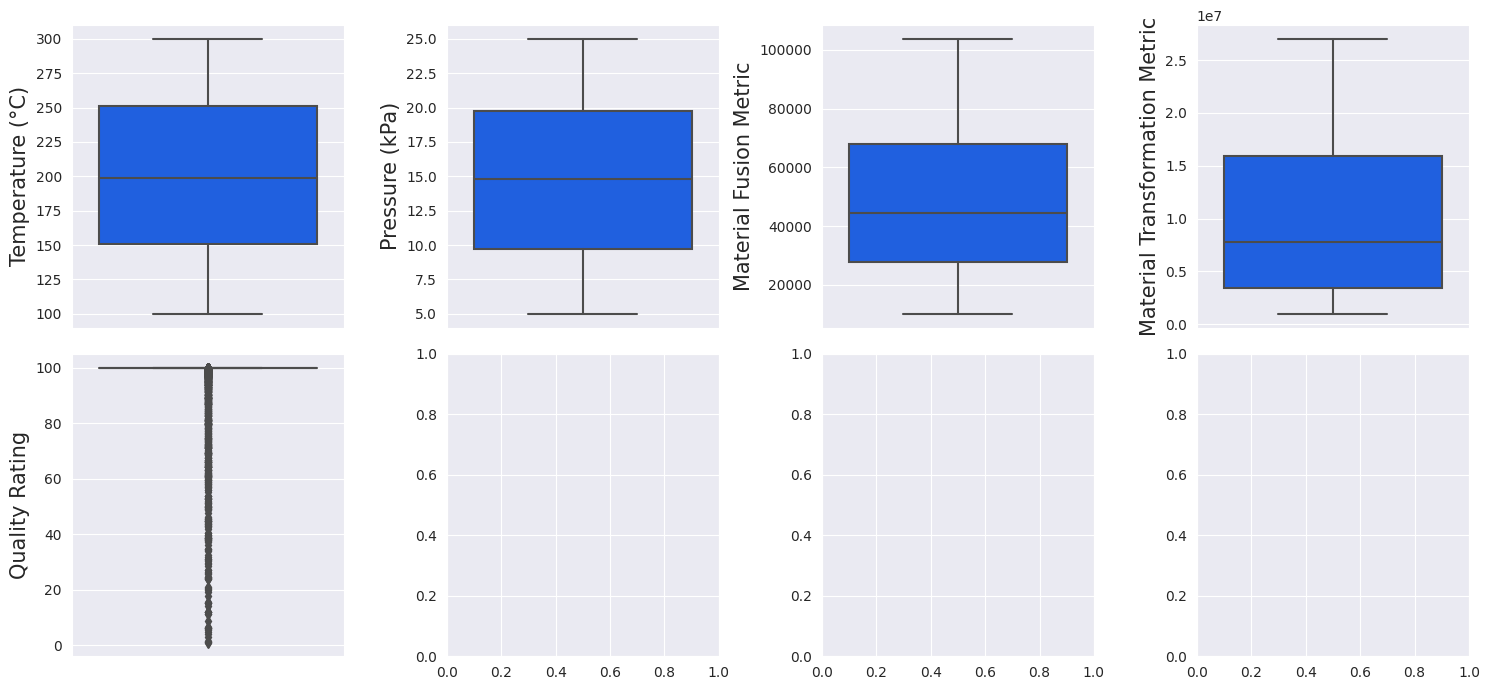

In [13]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df1.columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df1, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df1, x=col, y='Quality Rating', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [14]:
outliers_indexes = []
target = 'Quality Rating'

for col in df1.columns:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df1[(df1[col] < minimum) | (df1[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

868 outliers were identified, whose indices are:

[2050, 2052, 7, 8, 10, 13, 2064, 17, 19, 20, 21, 2068, 27, 2079, 2082, 38, 2086, 2093, 2099, 52, 2104, 2107, 66, 68, 2117, 70, 72, 2124, 2127, 2131, 2133, 89, 2140, 98, 2148, 103, 2151, 2153, 109, 111, 114, 2163, 116, 2164, 118, 2165, 2168, 122, 2173, 2178, 2179, 2180, 2184, 140, 2190, 143, 144, 2192, 2193, 147, 149, 2197, 151, 155, 156, 2208, 163, 164, 165, 2212, 2214, 2219, 174, 2223, 2224, 177, 2228, 2229, 184, 2233, 2240, 193, 2247, 2250, 2255, 209, 210, 2257, 219, 2267, 221, 223, 2272, 225, 228, 2278, 2279, 2282, 2287, 240, 2289, 2295, 2298, 251, 2301, 254, 258, 2306, 2308, 263, 2311, 265, 2314, 270, 271, 273, 2322, 275, 276, 277, 2323, 279, 2328, 281, 286, 2334, 2339, 292, 2344, 297, 298, 299, 300, 2345, 2354, 2356, 2357, 318, 2366, 2373, 2376, 331, 2387, 2390, 2391, 344, 349, 2400, 2401, 2405, 359, 361, 364, 368, 2421, 2423, 376, 377, 380, 2429, 382, 2430, 384, 385, 386, 2432, 2435, 393, 395, 2443, 401, 403, 404, 2452, 2456, 2463

It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it is important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:


Outlier is due to incorrectly entered or measured data

Outlier creates a significant association

# > **Checking for null, duplicated and missing values**

In [15]:
df1.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

There is no missing value in the dataset


In [16]:
df1[df1.duplicated(keep=False)]

,Temperature (°C),Pressure (kPa),Material Fusion Metric,Material Transformation Metric,Quality Rating


There is no duplicated value.

# > **EDA**

In [17]:
cols = df1.columns

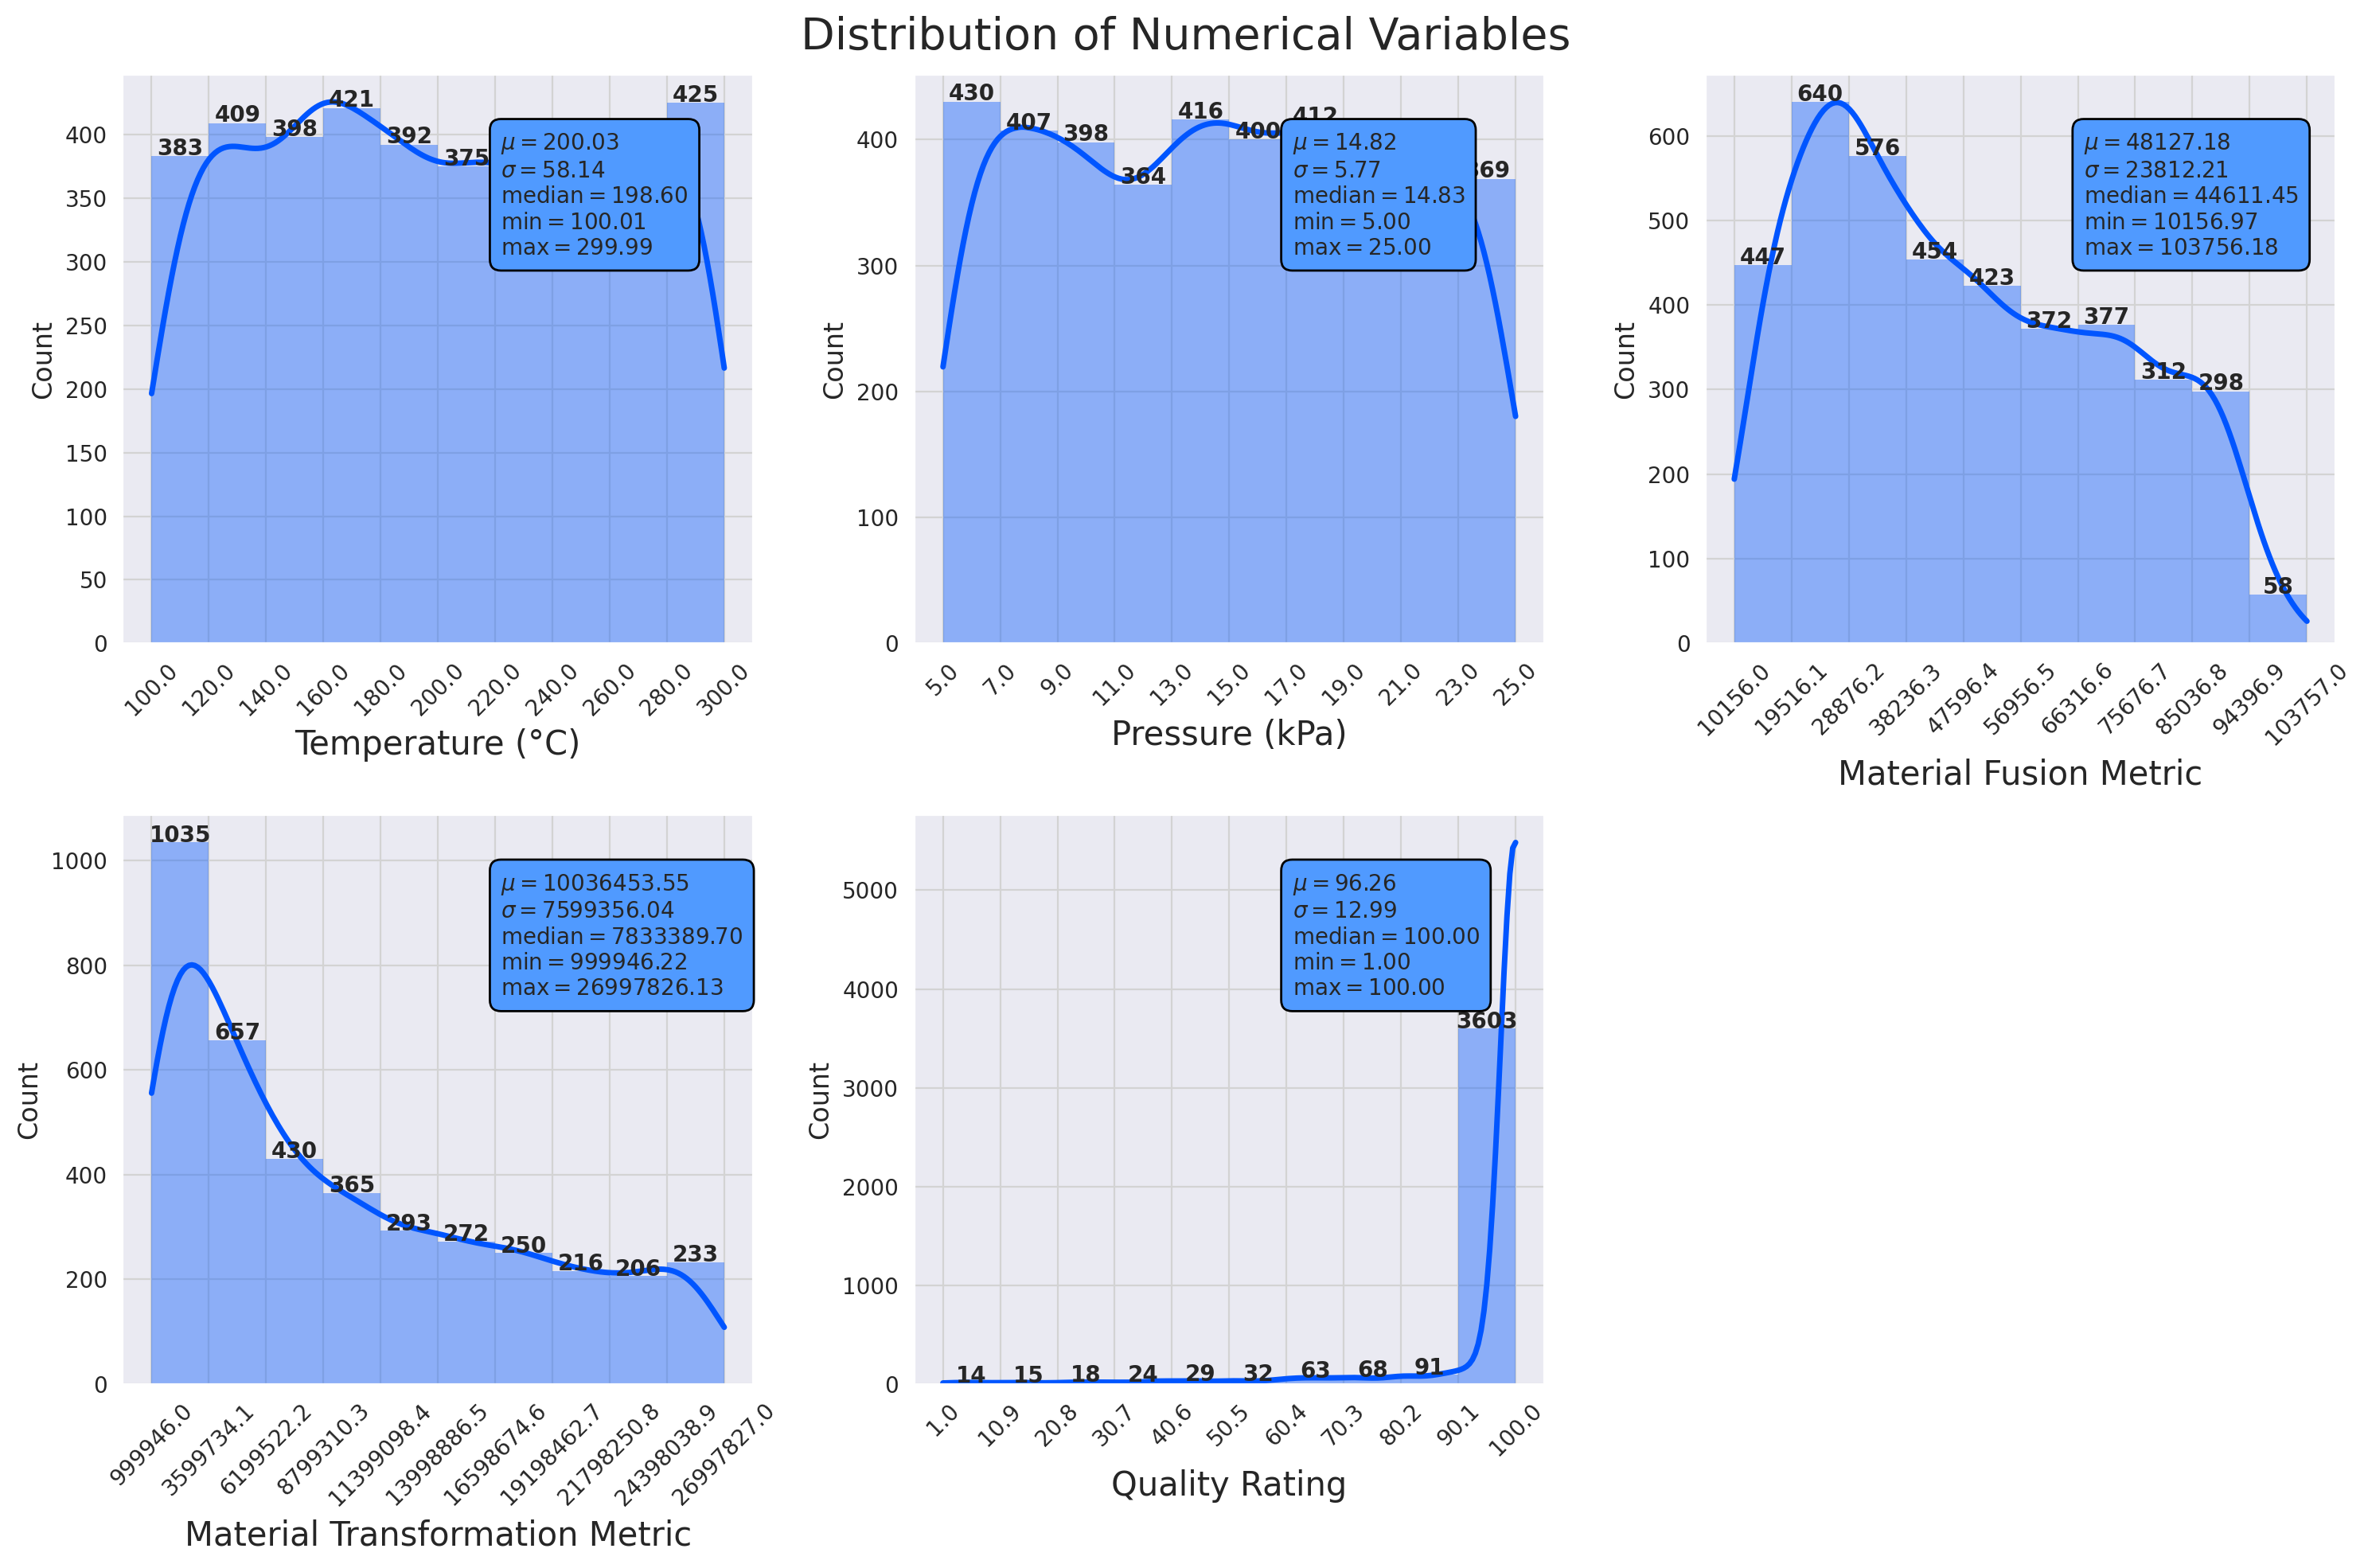

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(cols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[cols[i]],
                                     range=(np.floor(df1[cols[i]].min()), np.ceil(df1[cols[i]].max())))
    graph = sns.histplot(data=df1, x=cols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(cols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[cols[i]].mean(),
    r'$\sigma=%.2f$' %df1[cols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[cols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[cols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[cols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()

# > **Checking correlations and multicollinearity**

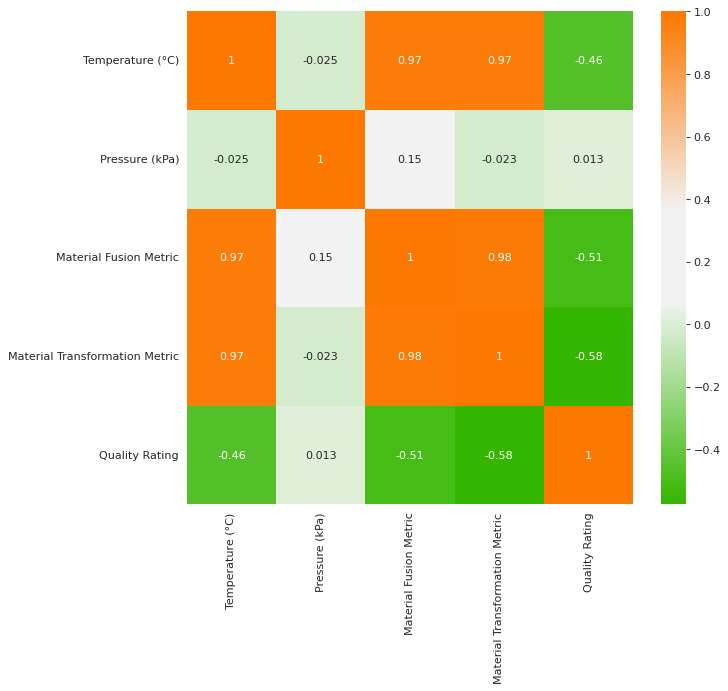

In [19]:
target = 'Quality Rating'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

Some variables like Material Transformation Metric and Material Fusion Metric are highly correlated with each other, these two features are having high correlation with Temperature (°C) as well.

# > **Simple linear Regression**

Defining independent and dependent features for linear regression

In [20]:
X = df1.drop('Quality Rating', axis=1)
y = df1['Quality Rating']

# > **Preprocessing data**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (2769, 4)
X_test shape:  (1188, 4)
y_train shape:  (2769,)
y_test shape:  (1188,)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_),
             index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,96.519888
Material Fusion Metric Coef.,14.815842
Temperature (°C) Coef.,14.276399
Pressure (kPa) Coef.,-2.510169
Material Transformation Metric Coef.,-35.437547


In [27]:
from sklearn import metrics

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [28]:
model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,5.865650
MSE,95.670569
RMSE,9.781133
R2-Score,0.524354


In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline

linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,5.691331,0.195556
MSE,83.839723,11.789415
RMSE,9.133829,0.642565
R2-Score,0.498430,0.033277


this linear regression model obtains r2_score of 49% using 6-fold cross-validation.


Pipeline method is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset. This is ideal for using in cross-validation since it ensures that only the training folds are used when performing fit and the test set is only used for calculating the accuracy score in each iteration of cross-validation.

# > **Polynomial Regression**

In [30]:
from sklearn.preprocessing import PolynomialFeatures

polynomialConverter = PolynomialFeatures(degree=2, include_bias=False)

In [31]:
polyFeatures = polynomialConverter.fit_transform(X)

In [32]:
polyFeatures.shape

(3957, 14)

In [33]:
X.shape

(3957, 4)

In [34]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly =train_test_split(polyFeatures, y , test_size = 0.3, random_state= 42)

In [35]:
polymodel=LinearRegression()
polymodel.fit(X_train_poly,y_train_poly)

LinearRegression()

In [36]:
y_pred=polymodel.predict(X_test_poly)

In [37]:
pd.DataFrame({'Y_Test': y_test_poly,'Y_Pred':y_pred, 'Residuals':(y_test_poly-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
149,4.052686,32.448641,-28.395954
1025,98.873036,100.555390,-1.682354
2153,96.914933,95.264456,1.650476
720,99.951543,103.196974,-3.245430
325,99.999999,98.920659,1.079340


In [38]:
MAE_Poly = metrics.mean_absolute_error(y_test_poly,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test_poly,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)
R2_Score_poly = metrics.r2_score(y_test_poly, y_pred)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly,R2_Score_poly],
             index=['MAE', 'MSE', 'RMSE','R2_score'], columns=['metrics'])

,metrics
MAE,2.484304
MSE,15.208241
RMSE,3.899774
R2_score,0.924084


As you can see, with polynomial linear regression, we got the score of 0.92 which is a really good score for our model compared to 0.49 which we had for simple linear regression.
We can also use other degrees, however it probably would lead to overfitting. 